In [1]:
import tensorflow as tf
import tensorflow.keras as keras

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

import numpy as np
from matplotlib import pyplot as plt

In [2]:
lines = open("training_data.log").readlines()
data = [[eval(x) for x in line.strip().split('\t')]  for line in lines]

xs = [l[0] for l in data]
values = [float(l[1]) for l in data]
probs = [l[2] for l in data]

xs = np.array(xs)
values = np.array(values)
probs = np.array(probs)


In [3]:
(xs, probs, values)

(array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  1,  0,  0],
        [ 0,  0, -1,  0,  0,  0,  1,  0,  0],
        [ 1,  0, -1,  0,  0,  0,  1,  0,  0],
        [ 1,  0, -1,  0, -1,  0,  1,  0,  0],
        [ 1,  0, -1,  0, -1,  0,  1,  1,  0],
        [ 1, -1, -1,  0, -1,  0,  1,  1,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  0,  0,  0,  0,  0,  0,  0, -1],
        [ 1,  0,  0,  0,  0,  0,  1,  0, -1],
        [ 1,  0,  0,  0,  0, -1,  1,  0, -1],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  1,  0,  0],
        [ 0,  0, -1,  0,  0,  0,  1,  0,  0],
        [ 1,  0, -1,  0,  0,  0,  1,  0,  0],
        [ 1,  0, -1,  0,  0,  0,  1,  0, -1],
        [ 1,  0, -1,  0,  1,  0,  1,  0, -1],
        [ 1, -1, -1,  0,  1,  0,  1,  0, -1],
        [ 1, -1, -1,  0,  1,  0,  1,  1, -1],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  

In [4]:
inp_layer = keras.Input(shape=(9,))
l1 = keras.layers.Dense(128, activation="relu")(inp_layer)
l2 = keras.layers.Dense(20, activation="relu")(l1)
prob_logits = keras.layers.Dense(9, activation="sigmoid")(l2)
prob_head = keras.layers.Activation("softmax")(prob_logits)
value_head = keras.layers.Dense(1, activation="tanh")(l2)
model = keras.Model(inputs=inp_layer, outputs=[prob_logits, value_head])

In [5]:
model.compile(optimizer=keras.optimizers.SGD(0.01), loss=[
    keras.losses.CategoricalCrossentropy(from_logits=True),
    keras.losses.MeanSquaredError(),
])

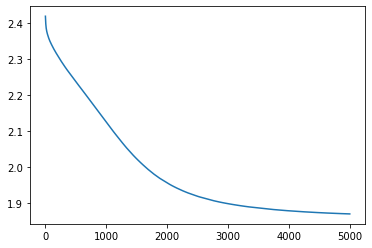

In [6]:
hist = model.fit(xs, [probs, values], epochs=5000, batch_size=2000, verbose=False)
plt.plot(hist.history['loss'])

In [7]:
model(np.array([xs[5]]))

[<tf.Tensor: shape=(1, 9), dtype=float32, numpy=
 array([[0.12482655, 0.15850028, 0.3147817 , 0.3030041 , 0.19795099,
         0.3215832 , 0.14245105, 0.38802785, 0.24685155]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.9069629]], dtype=float32)>]

In [8]:
probs[5]

array([0.        , 0.21052632, 0.        , 0.36842105, 0.        ,
       0.21052632, 0.        , 0.        , 0.21052632])

In [9]:
values[5]

1.0

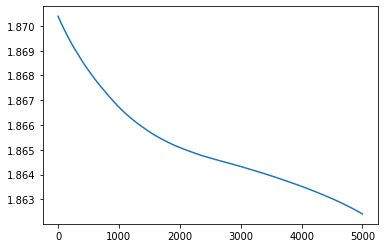

In [10]:
hist = model.fit(xs, [probs, values], epochs=5000, batch_size=2000, verbose=False)
plt.plot(hist.history['loss'])

In [11]:
tf.math.softmax(model(np.array([xs[5]]))[0])

<tf.Tensor: shape=(1, 9), dtype=float32, numpy=
array([[0.10800311, 0.10926971, 0.11609751, 0.11142736, 0.11034081,
        0.1145461 , 0.1083023 , 0.11125515, 0.11075792]], dtype=float32)>